### Methodologie

1 - regarder les nombres de valeurs de chaque modalité

2 - regarder les NAN, regarder à quoi ça correspondant. Et réfléchir à quoi les remplacer ou les supprimer

3 - Regarder les valeurs dupliquée. voir si ça se supprime ou si ça a un sens

4 - Merge

3 - Analyse univarié

4 - Analye Bivarié

5 - Analyse Multivarié


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Modalité , Nan et duplication

#### Observations

In [2]:
observations = pd.read_csv("observations.csv")
observations.head(5)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
print("type de donnée")
print(observations.info(),"\n")
print("Nombre de valeurs")
print(observations.count(),"\n")
print("Nombre de Nan")
print(observations.isna().sum(),"\n")
print("Nombre de valeurs dupliquées")
print(observations.duplicated().sum(),"\n")

type de donnée
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None 

Nombre de valeurs
scientific_name    23296
park_name          23296
observations       23296
dtype: int64 

Nombre de Nan
scientific_name    0
park_name          0
observations       0
dtype: int64 

Nombre de valeurs dupliquées
15 



In [4]:
print("Suppression des valeurs dupliquées")
observations = observations.drop_duplicates(keep = "first")
print("\nNombre de valeurs dupliquées:")
print(observations.duplicated().sum(),"\n")

Suppression des valeurs dupliquées

Nombre de valeurs dupliquées:
0 



let's now look at the repartition of the amount of the observation to see if there are abherent values

In [5]:
observations["observations"].describe().to_frame()

,observations
count,23281.000000
mean,142.280357
std,69.885439
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


According to this stat description, there is no out of tone value regarding the amount of observations recorded

<AxesSubplot:xlabel='park_name', ylabel='count'>

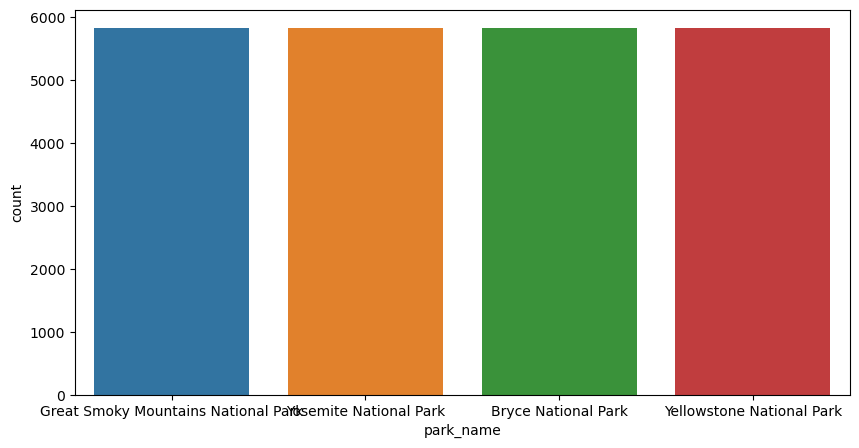

In [6]:
plt.figure(figsize = (10,5))
sns.countplot(x= "park_name", data = observations)

#### Species Informations

In [7]:
species_info = pd.read_csv("species_info.csv")
species_info.head(5)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [8]:
print("Nombre de valeurs")
print(species_info.count(),"\n")
print("Nombre de Nan")
print(species_info.isna().sum(),"\n")
print("Nombre de valeurs dupliquées")
print(species_info.duplicated().sum(),"\n")

Nombre de valeurs
category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64 

Nombre de Nan
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64 

Nombre de valeurs dupliquées
0 



In [9]:
species_info["conservation_status"].value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

The values in "Conservation_status" are only refering to species that are or might be endangered. As the majority of the other values are NAN, it is reasonable to assume that these NAN are refering to species thare are non endangered. Based on that Hypothesis(which is supported by some observation of the data), NAN values could be replaced by "Satisfactory"

In [10]:
species_info["conservation_status"] = species_info["conservation_status"].fillna("Satisfactory")

In [11]:
species_info["common_names"].to_frame().head(5)

,common_names
0,Gapper's Red-Backed Vole
1,"American Bison, Bison"
2,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom..."
3,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)"
4,Wapiti Or Elk


In [12]:
species_info["names"]= species_info["common_names"].apply(lambda x : x.split(",")[-1].split()[-1].strip("(").strip(")"))

Now that both dataset are cleaned of NAN and duplicated value, we can now merge them in order to pursue this analysis, as we might need to compare park and observation with conservation_status

In [13]:
df = pd.merge(observations, species_info, how = "left")

In [14]:
print("Nombre de valeurs")
print(df.count(),"\n")
print("Nombre de Nan")
print(df.isna().sum(),"\n")
print("Nombre de valeurs dupliquées")
print(df.duplicated().sum(),"\n")

Nombre de valeurs
scientific_name        25601
park_name              25601
observations           25601
category               25601
common_names           25601
conservation_status    25601
names                  25601
dtype: int64 

Nombre de Nan
scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
names                  0
dtype: int64 

Nombre de valeurs dupliquées
0 



### Analyse Univarié

Scientific name of the specie will serve as index, and common name provides data that are not relevant for this analysis and will be discarded

<AxesSubplot:xlabel='conservation_status', ylabel='count'>

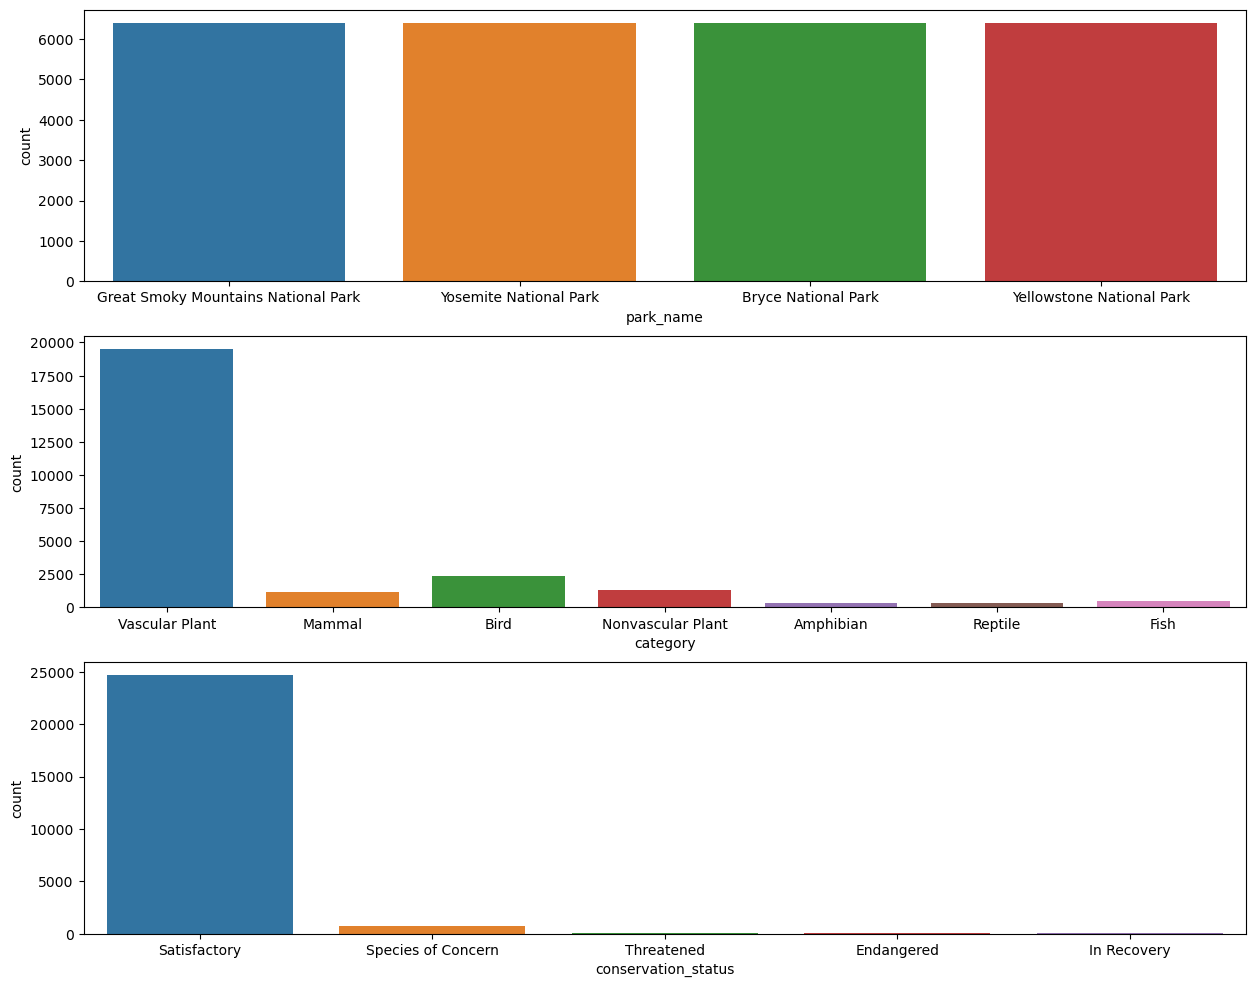

In [15]:
plt.figure(figsize = (15,12))
plt.subplot(3,1,1)
sns.countplot(x="park_name" , data=df)
plt.subplot(3,1,2)
sns.countplot(x="category" , data=df)
plt.subplot(3,1,3)
sns.countplot(x="conservation_status" , data=df)

- Observations have been equally performed amongs the parks
- The vast majority of specie observed are plants
- Fortunately, most of the species in the parks are not in a state of concern

<function matplotlib.pyplot.show(close=None, block=None)>

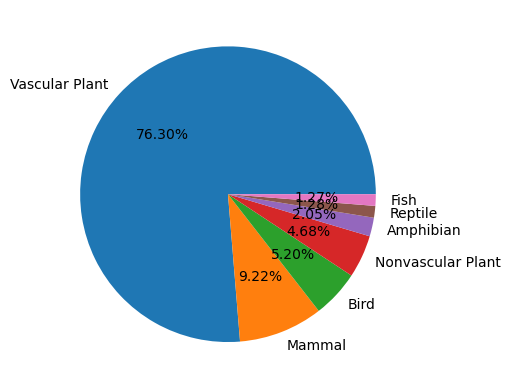

In [16]:
plt.pie(df["category"].value_counts(), labels = df["category"].unique(),autopct = "%0.2f%%")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

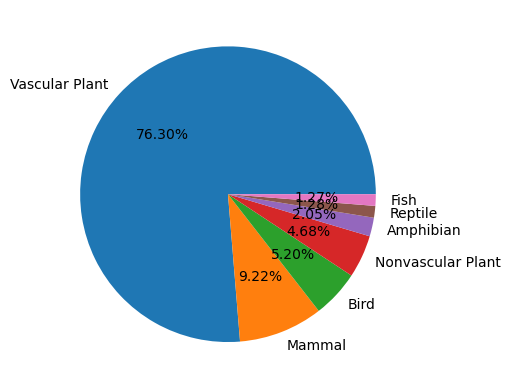

In [17]:
plt.pie(df["category"].value_counts(), labels = df["category"].unique(),autopct = "%0.2f%%")
plt.show

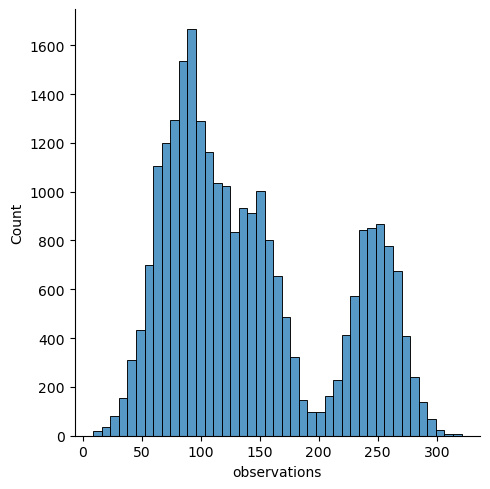

In [18]:
sns.displot(df.observations)

Observations are following a bimodal distribution, which means they are splitted in two different groups.



For the rest of the analyse we will separate the species in two type "Satisfactory" and "Concerning":


In [19]:
df["type"] = df.conservation_status.apply(lambda x : "Satisfactory" if x == "Satisfactory" else "Concerning")

### Analyse Bivariée

In [20]:
pd.crosstab(df["conservation_status"], df["park_name"])

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
conservation_status,,,,
Endangered,20,20,20,20
In Recovery,6,6,6,6
Satisfactory,6186,6176,6177,6182
Species of Concern,183,183,183,183
Threatened,11,11,11,11


All the species from the sample are present in the 4 parks.

<AxesSubplot:xlabel='conservation_status', ylabel='count'>

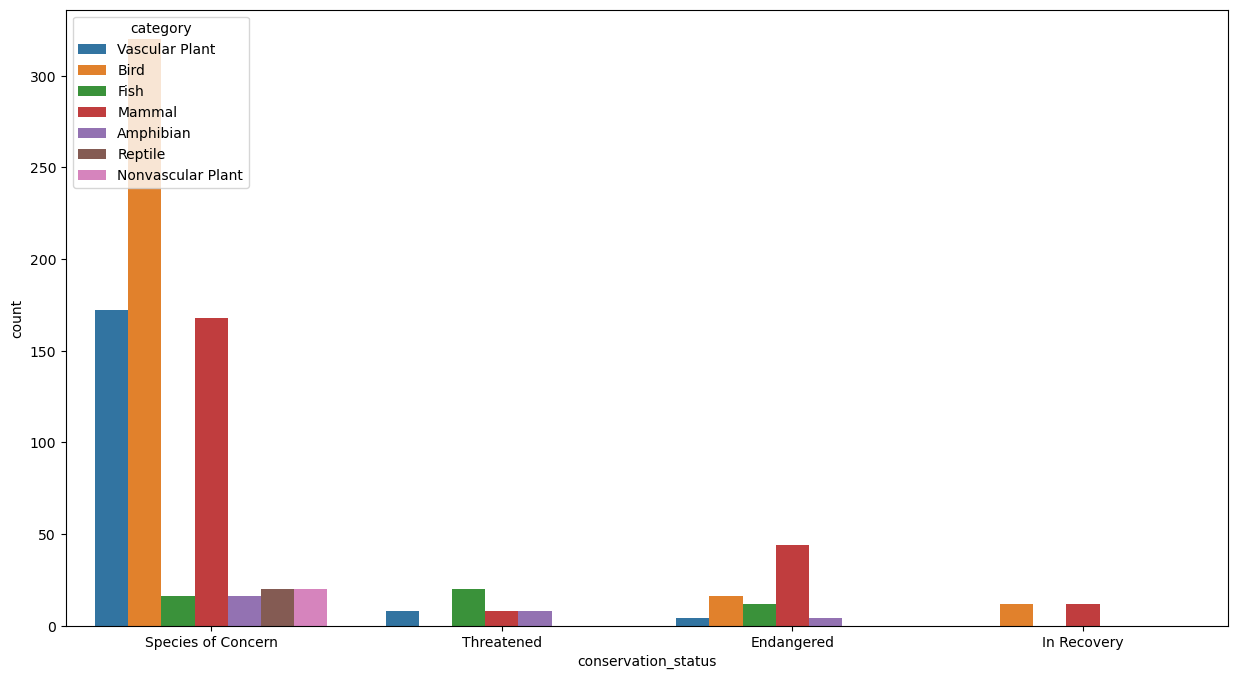

In [21]:
plt.figure(figsize = (15,8))
sns.countplot(x = "conservation_status", hue = "category", data = df[df["type"] == "Concerning"])

<AxesSubplot:xlabel='names', ylabel='count'>

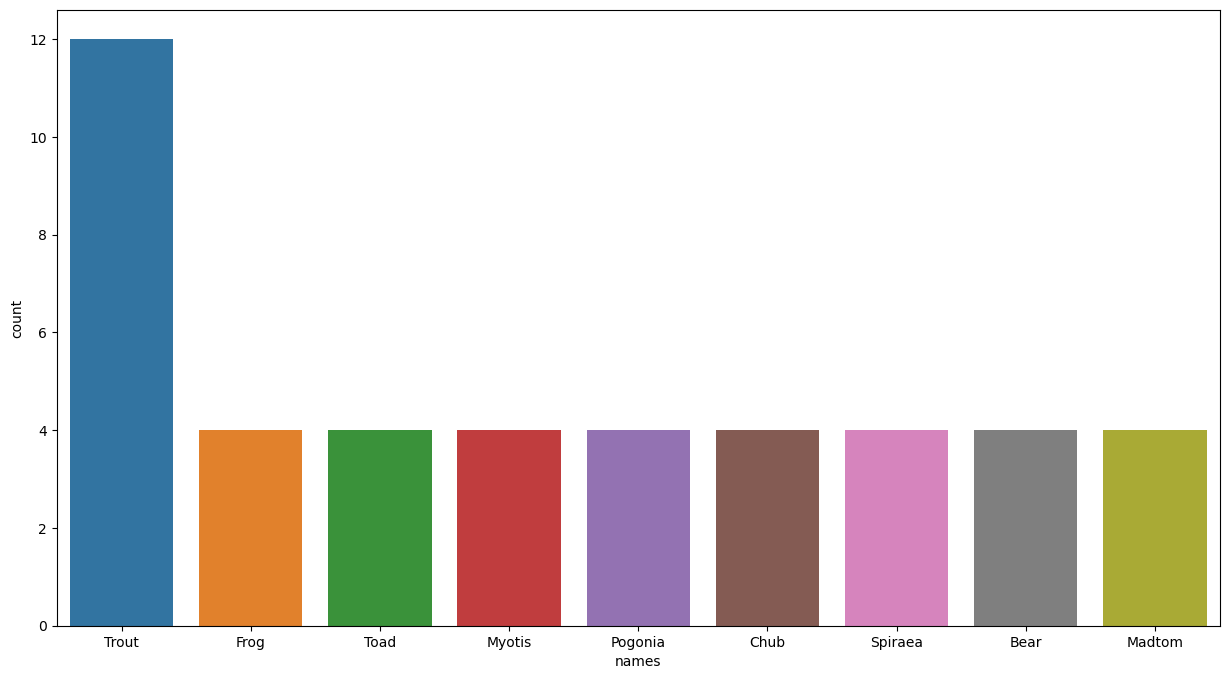

In [26]:
plt.figure(figsize = (15,8))
sns.countplot(x = "names", data = df[df["conservation_status"] == "Threatened"])

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x ="conservation_status", y= "observations" , data =df)

In [ ]:
ax1 = plt.figure(figsize = (10,6))
sns.boxplot(x ="category", y= "observations" , data =df)
ax2 = plt.figure(figsize = (10,6))
sns.boxplot(x ="category", y= "observations" , data =df[df["type"] == "Concerning"])

As expected, the more concerning the species are, the less observations they are. Howewer, the simple amount of observation recorded can't determine in which category fall a species. 

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x = "conservation_status", y = "observations", hue = "park_name",
            hue_order = ["Yellowstone National Park", "Yosemite National Park", "Bryce National Park","Great Smoky Mountains National Park"],
            errwidth= 0, palette = "Greens_r", data = df)
plt.title("Average observation")

In [ ]:
sns.relplot(x = "conservation_status", y = "observations", hue = "park_name"
            ,hue_order = ["Yellowstone National Park", "Yosemite National Park", "Bryce National Park","Great Smoky Mountains National Park"]
            ,data = df, height = 5, aspect = 1.5)

The amount of obervations seems correlated to the size of the Park, which is not surprising as a larger area means a larger space for species to live

Questions :
- Combien d'espece en danger?
- Combien dans chaque catégorie?
- Qu'elles sont les traits d'une espece en danger? (compliqué vu qu'on à que les observations)
- Comment sont-elles repartie dans les parks
- Sur quelles especes chaque park doit-il mettre la priorité? peux-on mettre en place des seuils d'alertes?


In [ ]:
df.groupby("conservation_status").observations.sum().reset_index().sort_values("observations")

In [ ]:
df.groupby(["conservation_status","category"]).observations.sum().reset_index().sort_values("conservation_status")

In [ ]:
threatened = df[df["conservation_status"] == "Threatened"]
plt.figure(figsize = (15,8))
sns.boxplot(x = "park_name", y ="observations", hue = "category", data = threatened)

In [ ]:
parks = df["park_name"].unique()
categories = df["category"].unique()
status = df["conservation_status"].unique()

In [ ]:
plt.figure(figsize = (10,20))
n=1
for i in status:
    plt.subplot(len(status),1,n)
    n+=1
    sns.boxplot(x = "park_name", y ="observations", hue = "category", data = df[df["conservation_status"] == i])
    plt.title(i)
